In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from PIL import Image, ImageFile
# Allow truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("osamajalilhassan/bone-fracture-dataset")

print("Path to dataset files:", path)

100%|██████████| 173M/173M [00:02<00:00, 77.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/osamajalilhassan/bone-fracture-dataset/versions/1


In [ ]:
train_data_dir =  '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training'
test_data_dir = '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing'
validation_data_dir = '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing'

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [ ]:
import os
# Check if the path from kagglehub exists
if os.path.exists(path):
    print("Path exists!")
else:
    print("Path does not exist. Please check the path or download the dataset.")

# If the path doesn't exist, print error messages for troubleshooting:
print("Current working directory:", os.getcwd())

# Instead of listing /kaggle/input, list the contents of the downloaded path
print("Contents of the downloaded path:", os.listdir(path))

# Update data directory paths
train_data_dir =  os.path.join(path, 'BoneFractureDataset/training')
test_data_dir = os.path.join(path, 'BoneFractureDataset/testing')
validation_data_dir = os.path.join(path, 'BoneFractureDataset/testing')

Path exists!
Current working directory: /content
Contents of the downloaded path: ['BoneFractureDataset']


In [ ]:
train_data_dir = tf.keras.preprocessing.image_dataset_from_directory(train_data_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
test_data_dir = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
validation_data_dir = tf.keras.preprocessing.image_dataset_from_directory(validation_data_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [ ]:
class_names = train_data_dir.class_names
class_names

['fractured', 'not_fractured']

In [ ]:
class_names = train_data_dir.class_names

def show_images(dataset, title):
    plt.figure(figsize=(6, 6))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

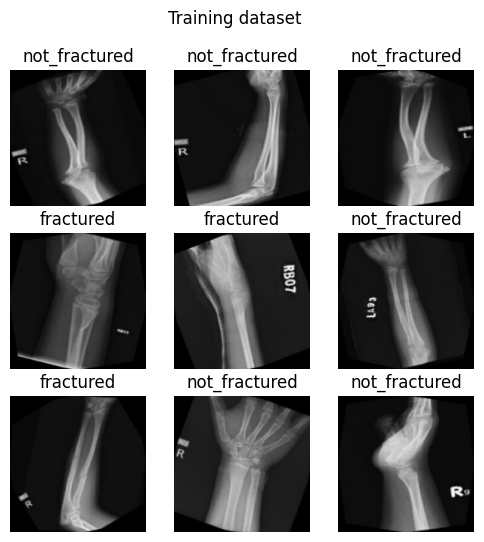

In [ ]:
show_images(train_data_dir, 'Training dataset')

In [ ]:
def count_classes(dataset, class_name):
    return len(list(Path(dataset).glob(f"{class_name}/*")))

def create_class_counts_df(dataset, class_names):  # 'dataset' is the intended variable
    counts = {'class': [], 'count': []}
    for class_name in class_names:
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset, class_name))  # Use 'dataset' instead of 'dataset_path'
    return pd.DataFrame(counts)  # Moved return statement outside the loop

In [ ]:
train_df = create_class_counts_df('/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training', class_names)

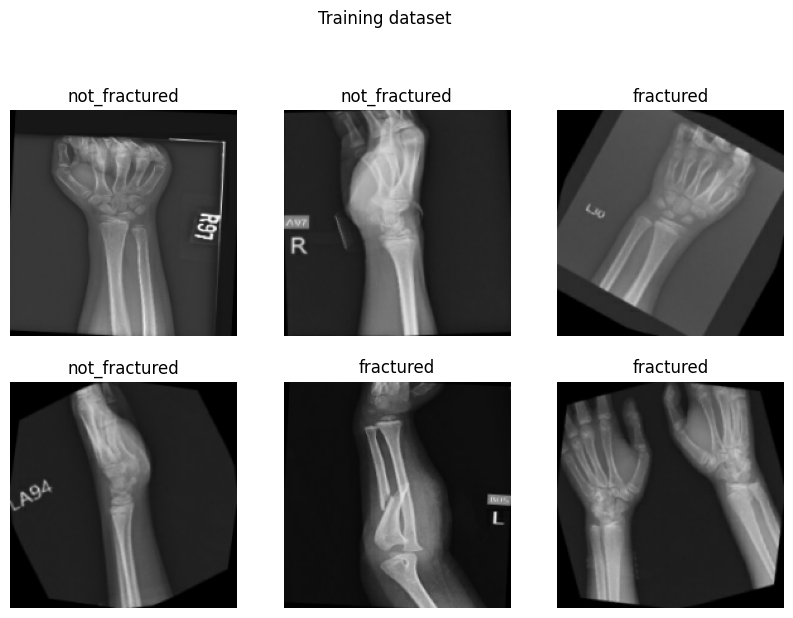

In [ ]:
def show_images(dataset, title):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(min(6, len(images))):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_images(train_data_dir, 'Training dataset')

In [ ]:
def count_classes(dataset_path, class_name):  # Pass dataset_path to the function
    return len(list(Path(dataset_path).glob(f"{class_name}/*")))

In [ ]:
def create_class_counts_df(dataset_path, class_names):  # Pass the full path
    counts = {'class': [], 'count': []}
    for class_name in class_names:
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset_path, class_name))
    return pd.DataFrame(counts)

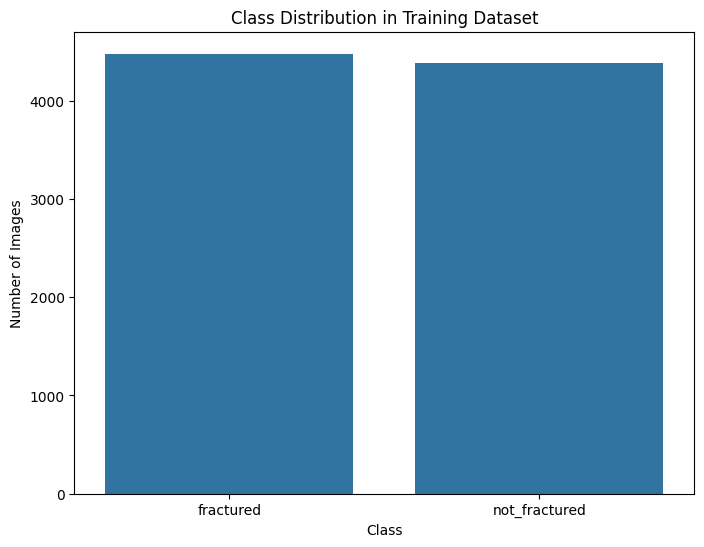

In [ ]:
train_df = create_class_counts_df(os.path.join(path, 'BoneFractureDataset/training'), class_names) #Pass train_data_dir, not the downloaded path

plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='count', data=train_df)
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
image_sizes = []
for images, labels in train_data_dir:
    for image in images:
        image_sizes.append(image.shape)

In [ ]:
image_sizes_df = pd.DataFrame(image_sizes, columns=['height', 'width', 'channels'])

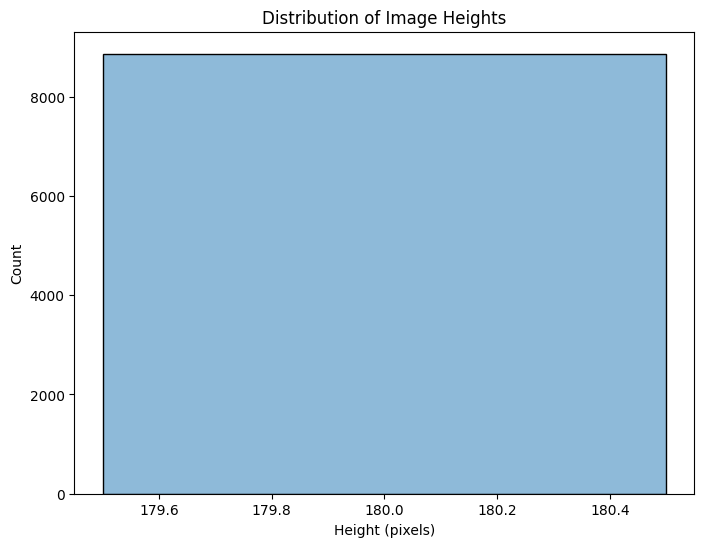

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(image_sizes_df['height'], kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.show()

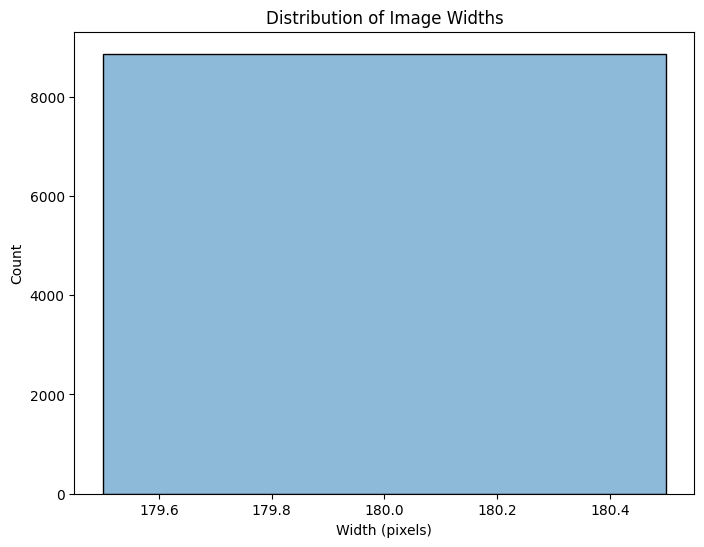

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(image_sizes_df['width'], kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.show()


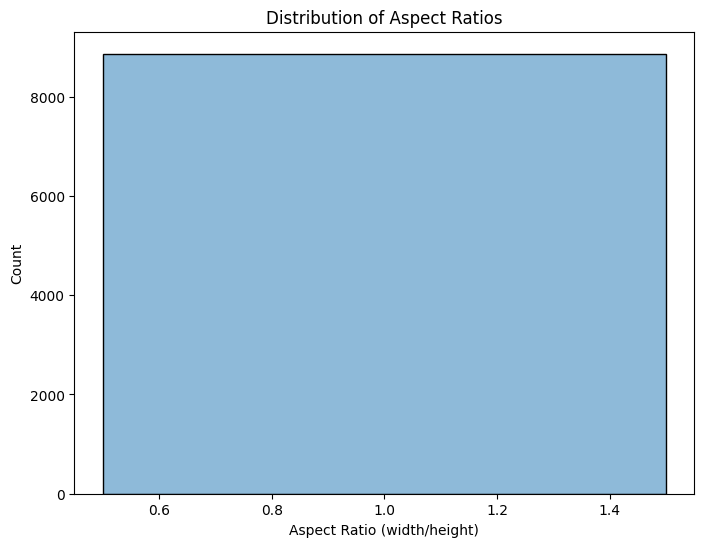

In [ ]:
aspect_ratios = image_sizes_df['width'] / image_sizes_df['height']
plt.figure(figsize=(8, 6))
sns.histplot(aspect_ratios, kde=True)
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio (width/height)')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
path = kagglehub.dataset_download("osamajalilhassan/bone-fracture-dataset")
train_data_dir = os.path.join(path, 'BoneFractureDataset/training')
test_data_dir = os.path.join(path, 'BoneFractureDataset/testing')
validation_data_dir = os.path.join(path, 'BoneFractureDataset/testing')

In [ ]:
image_size = (224, 224)
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # Use the updated test_data_dir
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Nadam, Adamax
#trying different optimizers to get best results
from keras.layers import Input, Conv2D, MaxPooling2D,GlobalAveragePooling2D,LSTM
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model = Sequential()
# Changed input_shape to match image dimensions from ImageDataGenerator
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3), kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, (3, 3), activation='relu'))  # Removed redundant input_shape
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu')) #Corrected activation function name
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #Corrected activation function name

In [ ]:
model.compile(optimizer=Adamax(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    verbose = 1
   )

Epoch 1/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 107s 340ms/step - accuracy: 0.5035 - loss: 0.7218 - val_accuracy: 0.4000 - val_loss: 0.8304
Epoch 2/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 120s 286ms/step - accuracy: 0.5180 - loss: 0.6988 - val_accuracy: 0.4000 - val_loss: 1.8165
Epoch 3/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 146s 311ms/step - accuracy: 0.5459 - loss: 0.6915 - val_accuracy: 0.6000 - val_loss: 1.6219
Epoch 4/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 134s 281ms/step - accuracy: 0.5428 - loss: 0.6871 - val_accuracy: 0.6000 - val_loss: 1.1653
Epoch 5/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 80s 283ms/step - accuracy: 0.5584 - loss: 0.6814 - val_accuracy: 0.7333 - val_loss: 0.6156
Epoch 6/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 80s 284ms/step - accuracy: 0.5723 - loss: 0.6734 - val_accuracy: 0.4000 - val_loss: 1.3997
Epoch 7/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 88s 310ms/step - accuracy: 0.5773 - loss: 0.6738 - val_accuracy: 0.6000 - val_loss: 0.9929
Epoch 8/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 134s 283ms/step - accuracy: 0.5830 - lo

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6137 - loss: 0.8810
Test Accuracy: 58.17%


In [ ]:
predictions = model.predict(test_generator)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[159 201]
 [104 136]]


In [ ]:
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

not_fractured       0.60      0.44      0.51       360
    fractured       0.40      0.57      0.47       240

     accuracy                           0.49       600
    macro avg       0.50      0.50      0.49       600
 weighted avg       0.52      0.49      0.49       600



USING ANOTHER OPTIMIZER

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Nadam, Adamax
#trying different optimizers to get best results
from keras.layers import Input, Conv2D, MaxPooling2D,GlobalAveragePooling2D,LSTM
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model = Sequential()
# Changed input_shape to match image dimensions from ImageDataGenerator
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3), kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, (3, 3), activation='relu'))  # Removed redundant input_shape
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu')) #Corrected activation function name
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #Corrected activation function name

In [ ]:
model.compile(optimizer=Adagrad(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
   )

Epoch 1/5
277/277 ━━━━━━━━━━━━━━━━━━━━ 1933s 7s/step - accuracy: 0.5181 - loss: 0.6966 - val_accuracy: 0.6000 - val_loss: 0.6937
Epoch 2/5
244/277 ━━━━━━━━━━━━━━━━━━━━ 3:44 7s/step - accuracy: 0.5362 - loss: 0.6931

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
   )

Epoch 1/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 99s 320ms/step - accuracy: 0.5120 - loss: 0.6979 - val_accuracy: 0.6000 - val_loss: 0.6901
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 82s 287ms/step - accuracy: 0.5353 - loss: 0.6937 - val_accuracy: 0.6000 - val_loss: 0.6715
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 287ms/step - accuracy: 0.5486 - loss: 0.6904 - val_accuracy: 0.7833 - val_loss: 0.6103
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 80s 285ms/step - accuracy: 0.5476 - loss: 0.6903 - val_accuracy: 0.8233 - val_loss: 0.5943
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 283ms/step - accuracy: 0.5602 - loss: 0.6836 - val_accuracy: 0.6533 - val_loss: 0.6429
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 83s 288ms/step - accuracy: 0.5675 - loss: 0.6795 - val_accuracy: 0.3533 - val_loss: 0.7453
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 79s 278ms/step - accuracy: 0.5820 - loss: 0.6727 - val_accuracy: 0.7017 - val_loss: 0.5948
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 284ms/step - accuracy: 0.6031 - loss: 0

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6528 - loss: 1.0747
Test Accuracy: 67.17%


In [ ]:
predictions = model.predict(test_generator)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[275  85]
 [196  44]]


In [ ]:
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

not_fractured       0.58      0.76      0.66       360
    fractured       0.34      0.18      0.24       240

     accuracy                           0.53       600
    macro avg       0.46      0.47      0.45       600
 weighted avg       0.49      0.53      0.49       600

